In [1]:
import pandas as pd

# Library to crawl a stock data
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [25]:
start = '2015-01-01'
end = '2019-12-31'

# Get Facebook stock data
fb = pdr. data.DataReader('FB', 'yahoo', start, end) # Facebook

In [3]:
# Printing out facebook data as an example
fb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000
...,...,...,...,...,...,...
2019-12-24,206.789993,205.000000,206.300003,205.119995,6046300,205.119995
2019-12-26,207.820007,205.309998,205.570007,207.789993,9350700,207.789993
2019-12-27,208.929993,206.589996,208.669998,208.100006,10284200,208.100006


In [5]:
# Check out the basic statistic with describe functioin
fb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,144.452154,141.552568,143.036971,143.073386,2.261876e+07,143.073386
std,38.399162,37.734180,38.065057,38.086761,1.400415e+07,38.086761
min,74.830002,72.000000,74.040001,74.050003,5.913100e+06,74.050003
25%,112.772499,110.339998,111.695004,112.187500,1.435028e+07,112.187500
50%,147.930000,144.205002,146.114998,145.650002,1.900420e+07,145.650002
75%,179.145004,175.822502,177.824997,177.562500,2.560708e+07,177.562500
max,218.619995,214.270004,215.720001,217.500000,1.698037e+08,217.500000


In [10]:
'''
The default ddof of describe fuction is 1.
In this case, we should use 0 for the ddof value because we know the whole population.
However, it does not make significant difference
'''
print('Standard deviation when delta degree of freedom is 1')
print(fb.std(ddof=1), '\n')
print('Standard deviation when delta degree of freedom is 0')
print(fb.std(ddof=1))

Standard deviation when delta degree of freedom is 1
High         3.839916e+01
Low          3.773418e+01
Open         3.806506e+01
Close        3.808676e+01
Volume       1.400415e+07
Adj Close    3.808676e+01
dtype: float64 

Standard deviation when delta degree of freedom is 0
High         3.839916e+01
Low          3.773418e+01
Open         3.806506e+01
Close        3.808676e+01
Volume       1.400415e+07
Adj Close    3.808676e+01
dtype: float64


In [4]:
# Adj Close column contains adjusted close price of the stock
fb['Adj Close']

Date
2015-01-02     78.449997
2015-01-05     77.190002
2015-01-06     76.150002
2015-01-07     76.150002
2015-01-08     78.180000
                 ...    
2019-12-24    205.119995
2019-12-26    207.789993
2019-12-27    208.100006
2019-12-30    204.410004
2019-12-31    205.250000
Name: Adj Close, Length: 1258, dtype: float64

In [12]:
# Get a moving average data to figure out the golden cross.
fb_ma20 = fb['Adj Close'].rolling(window=20).mean()
fb_ma60 = fb['Adj Close'].rolling(window=60).mean()

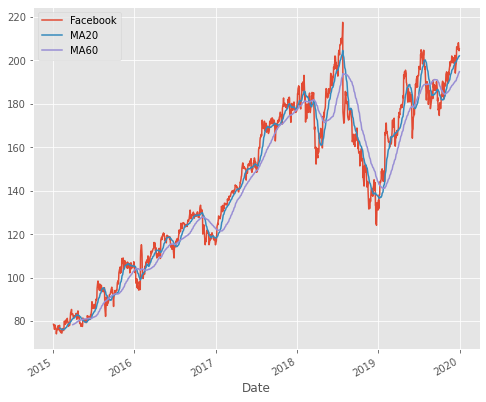

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib import style

mpl.rc('figure', figsize=(8, 7))
# Use ggplot style
style.use('ggplot')

fb['Adj Close'].plot(label='Facebook')
fb_ma20.plot(label='MA20')
fb_ma60.plot(label='MA60')
plt.legend()
plt.show()

In [16]:
# Use shift function to get daily variation of the price
fb['Daily Diff'] = fb['Adj Close'] - fb['Adj Close'].shift(1)
fb['Daily Diff']

Date
2015-01-02         NaN
2015-01-05   -1.259995
2015-01-06   -1.040001
2015-01-07    0.000000
2015-01-08    2.029999
                ...   
2019-12-24   -1.059998
2019-12-26    2.669998
2019-12-27    0.310013
2019-12-30   -3.690002
2019-12-31    0.839996
Name: Daily Diff, Length: 1258, dtype: float64

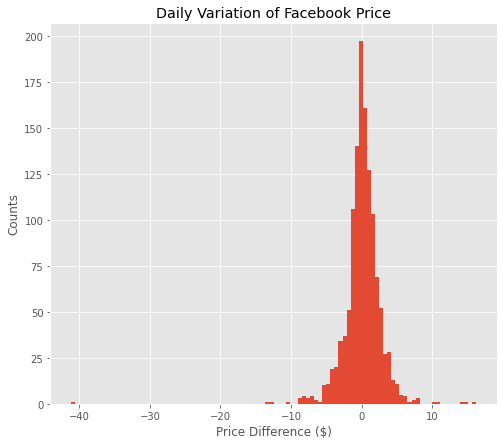

In [22]:
# Show the histogram of the daily difference
fb['Daily Diff'].hist(bins=100)
plt.title('Daily Variation of Facebook Price')
plt.xlabel('Price Difference ($)')
plt.ylabel('Counts')
plt.show()

In [24]:
# Check the statistics with describe
fb['Daily Diff'].describe()
# The mean difference is positive. Which tell us Facebook price has increased constantly.

count    1257.000000
mean        0.100875
std         2.696502
min       -41.240005
25%        -0.979996
50%         0.100006
75%         1.360001
max        16.270004
Name: Daily Diff, dtype: float64